In [3]:
import pandas as pd

In [5]:
df=pd.read_csv('/content/AMZN_stock_data.csv')

In [3]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0
1,1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0
2,1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0
3,1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0
...,...,...,...,...,...,...,...,...
6982,2025-02-14 00:00:00-05:00,229.199997,229.889999,227.229996,228.679993,27031100,0.0,0.0
6983,2025-02-18 00:00:00-05:00,228.820007,229.300003,223.720001,226.649994,42975100,0.0,0.0
6984,2025-02-19 00:00:00-05:00,225.520004,226.830002,223.710007,226.630005,28566700,0.0,0.0
6985,2025-02-20 00:00:00-05:00,224.779999,225.130005,221.809998,222.880005,30001700,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6987 entries, 0 to 6986
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6987 non-null   object 
 1   Open          6987 non-null   float64
 2   High          6987 non-null   float64
 3   Low           6987 non-null   float64
 4   Close         6987 non-null   float64
 5   Volume        6987 non-null   int64  
 6   Dividends     6987 non-null   float64
 7   Stock Splits  6987 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 436.8+ KB


In [8]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-8-b9c6864122be>:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


In [9]:
df.nunique()

,0
Date,6987
Open,6246
High,6204
Low,6208
Close,6343
Volume,6792
Dividends,1
Stock Splits,4


In [10]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0


In [11]:
df[df.duplicated()]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits


In [12]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0
1,1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0
2,1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0
3,1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0
...,...,...,...,...,...,...,...,...
6982,2025-02-14 00:00:00-05:00,229.199997,229.889999,227.229996,228.679993,27031100,0.0,0.0
6983,2025-02-18 00:00:00-05:00,228.820007,229.300003,223.720001,226.649994,42975100,0.0,0.0
6984,2025-02-19 00:00:00-05:00,225.520004,226.830002,223.710007,226.630005,28566700,0.0,0.0
6985,2025-02-20 00:00:00-05:00,224.779999,225.130005,221.809998,222.880005,30001700,0.0,0.0


In [13]:
avg_volume = df['Volume'].mean()
print(f"Average Daily Volume: {avg_volume:.2f}")
# average daily trading volume

Average Daily Volume: 136055187.51


In [14]:
total_return = (df['Close'].iloc[-1] - df['Close'].iloc[0]) / df['Close'].iloc[0]
print(f"Total Return: {total_return:.2%}")
# total return over the entire dataset period

Total Return: 221087.34%


<Axes: title={'center': 'Cumulative Return Over Time'}, xlabel='Date'>

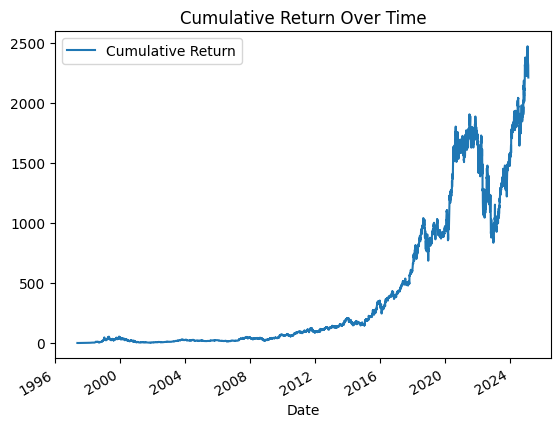

In [15]:
df['Cumulative Return'] = df['Close'] / df['Close'].iloc[0]
df.plot(x='Date', y='Cumulative Return', title='Cumulative Return Over Time')
# cumulative return evolve over time

<Axes: >

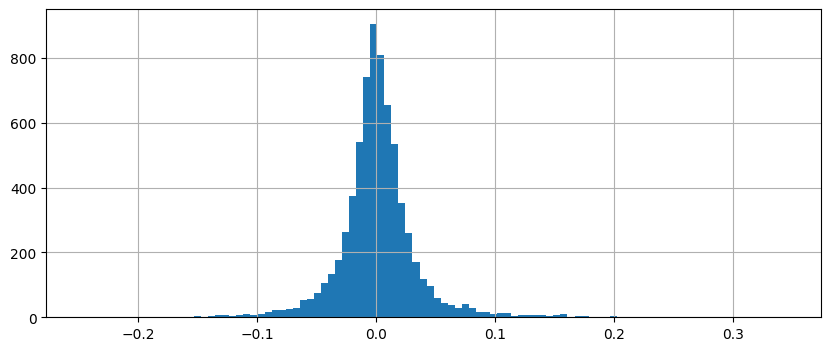

In [16]:
df['Daily Return'] = df['Close'].pct_change()
df['Daily Return'].hist(bins=100, figsize=(10, 4))
# the daily return distribution

<Axes: title={'center': '30-Day Rolling Volatility'}, xlabel='Date'>

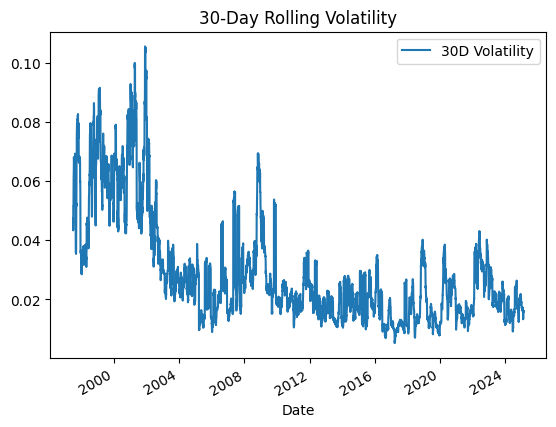

In [17]:
df['30D Volatility'] = df['Daily Return'].rolling(window=30).std()
df.plot(x='Date', y='30D Volatility', title='30-Day Rolling Volatility')
# volatility (standard deviation) over a rolling 30-day window

In [18]:
top_gains = df.sort_values('Daily Return', ascending=False).head(5)
print(top_gains[['Date', 'Daily Return']])
# the top 5 highest single-day gains

                           Date  Daily Return
1139  2001-11-26 00:00:00-05:00      0.344714
983   2001-04-09 00:00:00-04:00      0.335723
1132  2001-11-14 00:00:00-05:00      0.301783
2500  2007-04-25 00:00:00-04:00      0.269497
3131  2009-10-23 00:00:00-04:00      0.267951


In [19]:
top_losses = df.sort_values('Daily Return').head(5)
print(top_losses[['Date', 'Daily Return']])
# top 5 biggest single-day losses

                           Date  Daily Return
1056  2001-07-24 00:00:00-04:00     -0.247661
2313  2006-07-26 00:00:00-04:00     -0.218220
326   1998-08-31 00:00:00-04:00     -0.209089
1117  2001-10-24 00:00:00-04:00     -0.200000
784   2000-06-23 00:00:00-04:00     -0.193452


<ipython-input-21-6c4be94a4cbf>:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Month'] = df['Date'].dt.to_period('M')
<ipython-input-21-6c4be94a4cbf>:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Month'] = df['Date'].dt.to_period('M')


<Axes: title={'center': 'Average Monthly Return'}, xlabel='Month'>

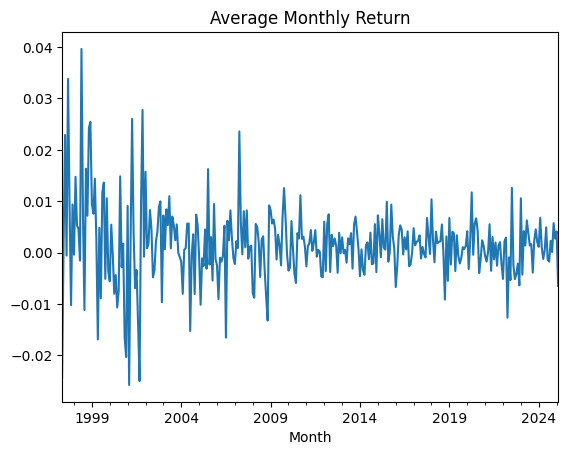

In [21]:
# Convert to datetime with timezone handling
df['Date'] = pd.to_datetime(df['Date'], utc=True)

# Now you can safely use .dt
df['Month'] = df['Date'].dt.to_period('M')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.to_period('M')
monthly_return = df.groupby('Month')['Daily Return'].mean()
monthly_return.plot(title='Average Monthly Return')

# average monthly return

<Axes: title={'center': 'Average Yearly Return'}, xlabel='Year'>

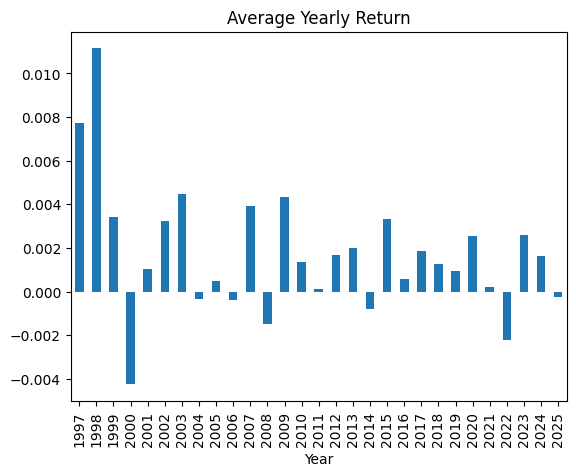

In [22]:
df['Year'] = df['Date'].dt.year
yearly_return = df.groupby('Year')['Daily Return'].mean()
yearly_return.plot(kind='bar', title='Average Yearly Return')
# average yearly return

[Text(0.5, 1.0, 'Price vs Volume')]

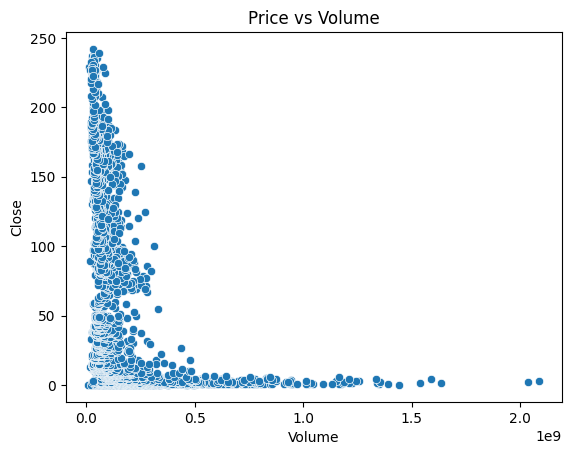

In [23]:
import seaborn as sns
sns.scatterplot(x='Volume', y='Close', data=df).set(title='Price vs Volume')
# How does the stock price move with volume over time

In [24]:
monthly_close = df.groupby('Month')['Close'].agg(['first', 'last'])
monthly_close['Monthly Return'] = monthly_close['last'] / monthly_close['first'] - 1
top_months = monthly_close.sort_values('Monthly Return', ascending=False).head(5)
print(top_months)
# top 5 months with highest cumulative returns

            first      last  Monthly Return
Month                                      
1998-06  0.356771  0.831250        1.329926
1997-09  0.117708  0.216927        0.842925
2001-04  0.455000  0.789000        0.734066
2001-11  0.347500  0.566000        0.628777
1997-07  0.075781  0.119792        0.580766


In [25]:
worst_months = monthly_close.sort_values('Monthly Return').head(5)
print(worst_months)
# worst 5 months by return

           first      last  Monthly Return
Month                                     
2001-02  0.81250  0.509375       -0.373077
2000-12  1.23125  0.778125       -0.368020
2000-11  1.86875  1.234375       -0.339465
2001-09  0.42950  0.298500       -0.305006
2006-07  1.93050  1.344500       -0.303548


<Axes: title={'center': 'Volatility by Year'}, xlabel='Year'>

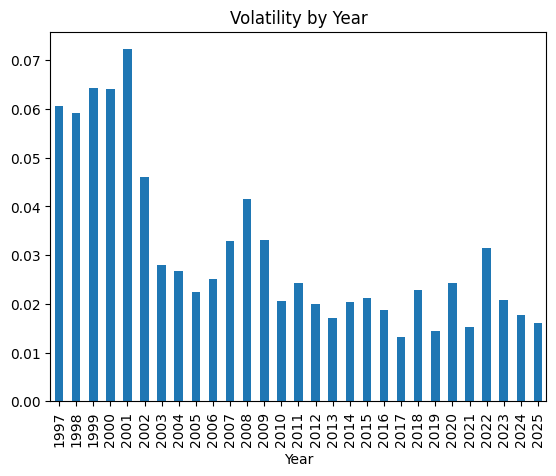

In [26]:
vol_by_year = df.groupby('Year')['Daily Return'].std()
vol_by_year.plot(kind='bar', title='Volatility by Year')
# Is there a trend in volatility over the years?

Split on 1998-06-02
Split on 1999-01-05
Split on 1999-09-02
Split on 2022-06-06


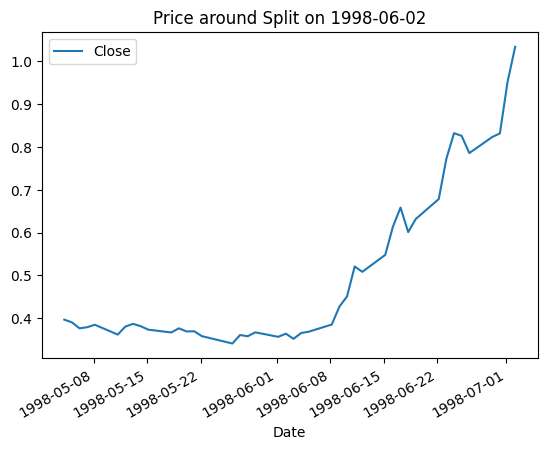

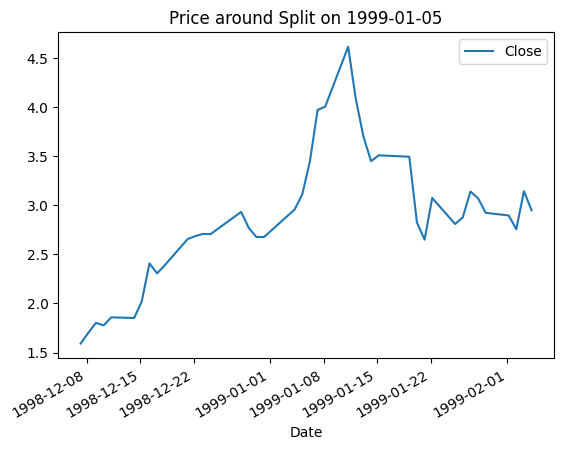

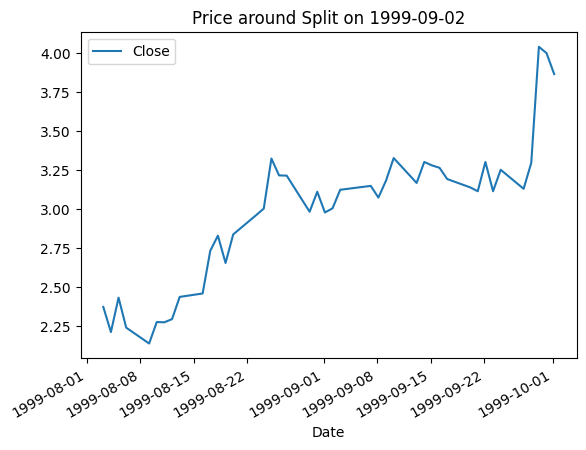

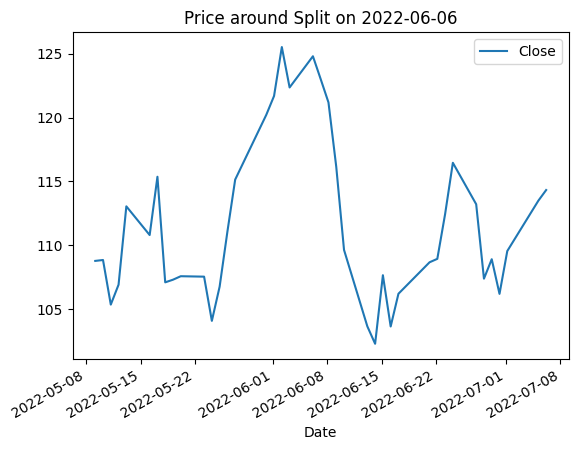

In [27]:
split_dates = df[df['Stock Splits'] > 0]['Date']
for date in split_dates:
    print(f"Split on {date.date()}")
    df[df['Date'].between(date - pd.Timedelta(days=30), date + pd.Timedelta(days=30))][['Date', 'Close']].plot(x='Date', y='Close', title=f'Price around Split on {date.date()}')
# How has the stock price changed since major splits?

In [28]:
correlation = df[['Open', 'Close']].corr().iloc[0, 1]
print(f"Correlation between Open and Close: {correlation:.2f}")
# correlation between Open and Close prices

Correlation between Open and Close: 1.00


<Axes: title={'center': '30-Day Moving Average vs Close'}, xlabel='Date'>

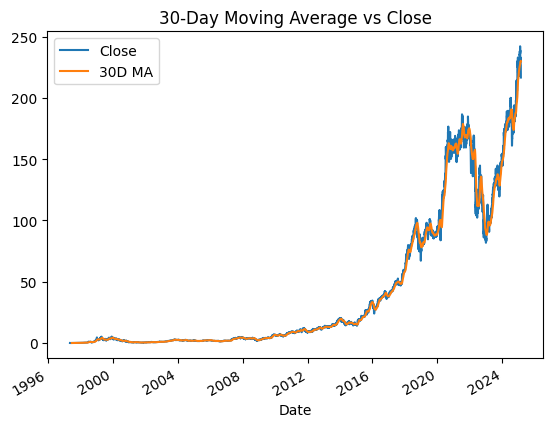

In [29]:
df['30D MA'] = df['Close'].rolling(window=30).mean()
df.plot(x='Date', y=['Close', '30D MA'], title='30-Day Moving Average vs Close')
# the rolling average (30-day) of the closing price

<Axes: title={'center': 'Percentage of Gain Days per Month'}, xlabel='Month'>

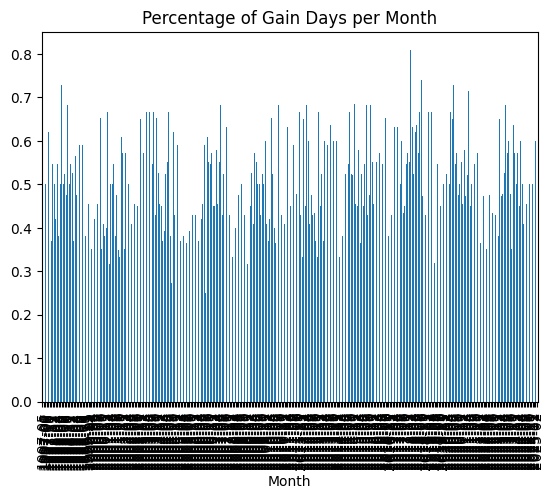

In [30]:
df['Gain'] = df['Daily Return'] > 0
bullish_bearish = df.groupby('Month')['Gain'].mean()
bullish_bearish.plot(kind='bar', title='Percentage of Gain Days per Month')
# Identify bullish and bearish months (more gain days than loss)

In [31]:
cum_return = df['Close'] / df['Close'].cummax()
max_drawdown = cum_return.min() - 1
print(f"Max Drawdown: {max_drawdown:.2%}")
# maximum drawdown in stock price

Max Drawdown: -94.40%


In [32]:
df['Gain_Streak'] = df['Daily Return'] > 0
df['Streak'] = df['Gain_Streak'].astype(int).groupby((~df['Gain_Streak']).cumsum()).cumsum()
longest_streak = df['Streak'].max()
print(f"Longest Bull Run: {longest_streak} days")
# Identify the longest bull run (consecutive positive days)

Longest Bull Run: 10 days


<Axes: title={'center': 'Long-Term Trend Indicator (200-Day MA)'}, xlabel='Date'>

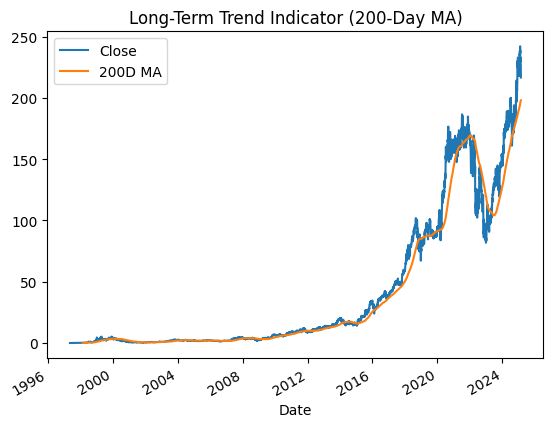

In [33]:
df['200D MA'] = df['Close'].rolling(window=200).mean()
df.plot(x='Date', y=['Close', '200D MA'], title='Long-Term Trend Indicator (200-Day MA)')
# clear indicators of long-term trend shifts